<a href="https://colab.research.google.com/github/ogwora/serotonin/blob/master/Moringa_School_Group__Project_Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the Study

### a) Specifying the question

Study the factors that contribute to an individual getting promoted, and then create a model that would allow the company to accurately predict whether candidates get promoted or not ahead of time given certain predictor variables

### b) Defining the Metric of Success

The model will be considered a success when it is able to consistently and accurately predict the target variable with an accuracy of 85% - 95%. The range ensures we have a well performing model while also avoiding overfitting.

### c) Understanding the context

A large MNC has 9 broad verticals across the organisation. One of the problems is identifying the right people for promotion (only for manager position and below) and preparing them in time. The final promotions are only announced after the evaluation and this leads to delay in transition to new roles. Hence, the company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

### d) Recording the experimental design

* Loading the Data
* Checking for duplicated entries
* Checking for null values
* Checking for outliers
* Performing Exploratory Data Analysis
  - Univariate analysis
  - Bivariate analysis
* Solution implementation using modelling:
  - Random Forest Classifier
  - Adaboost Classifier
  - Support Vector Machines
  - Naive Bayes Classifier
  - Multi-Layer Perceptrons classifier
* Recommendations

### e) Data Relevance

The dataset used for this project can be found by following this link: [source](https://www.kaggle.com/arashnic/hr-ana)

Below is the dataset glossary:
* employee_id: Unique ID for employee
* department: Department of employee
* region: Region of employment (unordered)
* education: Education Level
* gender: Gender of Employee
* recruitment_channel: Channel of recruitment for employee
* no_ of_ trainings: no of other trainings completed in 
previous year on soft skills, technical skills etc.
* age: Age of Employee
* previous_ year_ rating: Employee Rating for the previous year
* length_ of_ service: Length of service in years
* awards_ won: if awards won during previous year then 1 else 0
* avg_ training_ score: Average score in current training evaluations
* is_promoted: (Target: 1=Promoted, 0=Not Promoted) Recommended for promotion


## Loading the Libraries

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from yellowbrick.model_selection import validation_curve
from sklearn.utils import shuffle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Loading the data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Reading the Data

In [ ]:
# top of the train dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [ ]:
# tail of the dataset
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,9,NaN,m,sourcing,1,29,1.0,2,0,45,0
54807,51526,HR,22,Bachelor's,m,other,1,27,1.0,5,0,49,0


In [ ]:
# sample of five records from the dataset
train.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
48464,55681,Finance,27,Bachelor's,m,sourcing,1,31,5.0,8,0,55,0
48205,56790,Procurement,2,Below Secondary,m,other,1,26,3.0,2,0,71,0
23472,4487,Analytics,20,Bachelor's,m,other,1,27,2.0,2,0,83,0
5392,54833,Technology,2,Master's & above,m,other,1,48,4.0,19,0,81,0
24132,76952,Sales & Marketing,7,Bachelor's,m,other,1,40,4.0,6,0,46,0


## Dataset Information

In [ ]:
# number of records in the dataset
print("Train dataset", train.shape)
print("Test dataset", test.shape)

Train dataset (54808, 13)
Test dataset (23490, 12)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  int64  
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 5.4+ MB


In [ ]:
# mathematical information on numerical columns
train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
region,54808.0,14.195045,10.086273,1.0,4.00,13.0,22.0,34.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


## General Data Cleaning

### Consistency

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

### Completeness

In [ ]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
# dropping null values
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [ ]:
# number of records left
train.shape

(48660, 13)

In [ ]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won                 0
avg_training_score         0
dtype: int64

In [ ]:
# dropping null values in test dataset
test.dropna(inplace=True)
test.reset_index(drop=True, inplace=True)

In [ ]:
test.shape

(20819, 12)

### Casting as Category

In [ ]:
# Correctly casting some categorical columns as type category

train['is_promoted'] = train['is_promoted'].astype('category')
train['awards_won'] = train['awards_won'].astype('category')
test['awards_won'] = test['awards_won'].astype('category')

### Checking for outliers

In [ ]:
indexes = []
def outlier_detect(df):
  for i in df.describe().columns:
    q1 = df.describe().at['25%', i]
    q3 = df.describe().at['75%', i]
    iqr = q3 - q1

    upper = q3 + iqr * 1.5
    lower = q1 - iqr * 1.5

    outliers = []

    for pos, val in enumerate(df[i]):
      if val < lower or val > upper:
        outliers.append(val)
        if pos not in indexes:
          indexes.append(pos)
    
    print(f"Percentage outlier composition for {i}:  {len(outliers) * 100/len(df[i])}")
    print(outliers)

In [ ]:
outlier_detect(train)

Percentage outlier composition for employee_id:  0.0
[]
Percentage outlier composition for region:  0.0
[]
Percentage outlier composition for no_of_trainings:  19.030004110152074
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 3, 2, 2, 7, 2, 2, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 6, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3

##### Boxplots

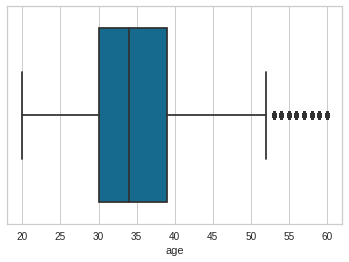

In [ ]:
# Boxplots for numerical columns
sns.boxplot(x='age', data=train)
plt.show()

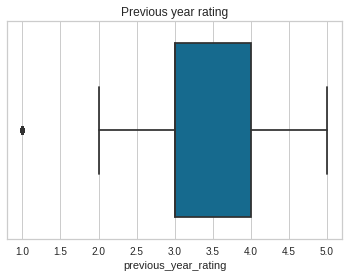

In [ ]:
sns.boxplot(x='previous_year_rating', data=train)
plt.title("Previous year rating")
plt.show()

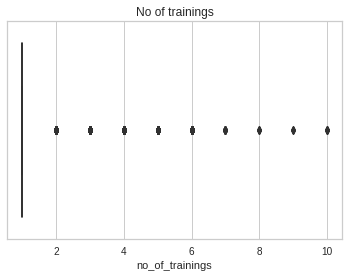

In [ ]:
sns.boxplot(x='no_of_trainings', data=train)
plt.title("No of trainings")
plt.show()

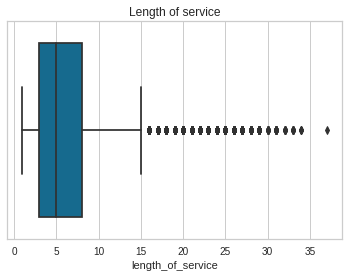

In [ ]:
sns.boxplot(x='length_of_service', data=train)
plt.title("Length of service")
plt.show()

These outliers aren't significant enough to affect model performances. They therefore do not need to be dropped.

### Column Correction

In [ ]:
# dropping unnecessary columns
train.drop(['employee_id'], axis=1, inplace=True)
test.drop(['employee_id'], axis=1, inplace=True)


## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# measures of central tendency
for i in ['avg_training_score', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service']:
  print(f"For column {i}")
  print("Mean: ", train[i].mean())
  print("Mode: ", train[i].mode())
  print("Median: ", train[i].median())
  print("===========================================")

For column avg_training_score
Mean:  63.60330867242088
Mode:  0    50
dtype: int64
Median:  60.0
For column no_of_trainings
Mean:  1.251993423756679
Mode:  0    1
dtype: int64
Median:  1.0
For column age
Mean:  35.58943690916564
Mode:  0    32
dtype: int64
Median:  34.0
For column previous_year_rating
Mean:  3.3375256884504725
Mode:  0    3.0
dtype: float64
Median:  3.0
For column length_of_service
Mean:  6.311570078092889
Mode:  0    3
dtype: int64
Median:  5.0


In [ ]:
# measures of dispersion

for x in ['avg_training_score', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service']:
  print(f"For column {x}")
  print("Skewness: ", train[x].skew())
  print("Kurtosis: ", train[x].kurt())
  print("Variance: ", train[x].var())
  print("Standard Deviation: ", train[x].std())
  print("=" * 40)

For column avg_training_score
Skewness:  0.4287383151341832
Kurtosis:  -1.0486361698767115
Variance:  176.18585805922885
Standard Deviation:  13.273502102279897
For column no_of_trainings
Skewness:  3.4096418373109376
Kurtosis:  18.40576817170712
Variance:  0.36601772822926343
Standard Deviation:  0.6049939902422696
For column age
Skewness:  1.004034242184669
Kurtosis:  0.7447274806153401
Variance:  56.76976038494982
Standard Deviation:  7.534571015323289
For column previous_year_rating
Skewness:  -0.3155543667130905
Kurtosis:  -0.7220380676846911
Variance:  1.5823686901267022
Standard Deviation:  1.2579223704691407
For column length_of_service
Skewness:  1.81036260042838
Kurtosis:  4.633178016107106
Variance:  17.68000341244434
Standard Deviation:  4.20475961410927


In [ ]:
print("Mark + Joy " * 50)

Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy Mark + Joy 


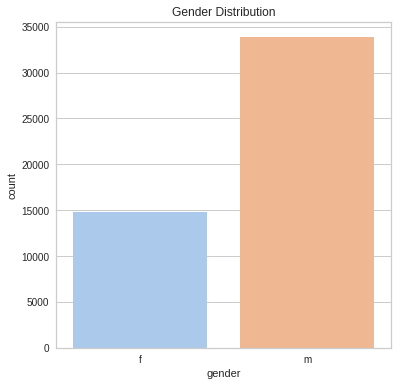

In [ ]:
# Value counts of gender in the dataset

plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=train, palette='pastel')
plt.title('Gender Distribution')
plt.show()

* The chart shows that there are more males than females being presented as candidates for promotion. Whether that is due to any gender bias or lack of an equal number of men and women in the company is unclear.

In [ ]:
#  Viewing the distribution for promotions only in terms of gender

gender = train[train['is_promoted'] == 1]
gender.groupby(by='gender')[['is_promoted']].sum()

,is_promoted
gender,
f,1363
m,2869


* You can see from above that more men get promoted than women overall. This shows an imbalance in the promotion distribution

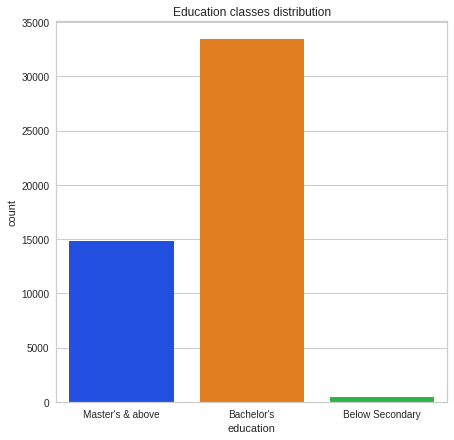

In [ ]:
# Education classes distribution

plt.figure(figsize=(7, 7))
sns.countplot(x='education', data=train, palette='bright')
plt.title("Education classes distribution")
plt.show()

* This chart shows that most candidates at the very least had a bachelor's Degree. Very few of them had gotten to Masters and above and even fewer had not gotten past Secondary education

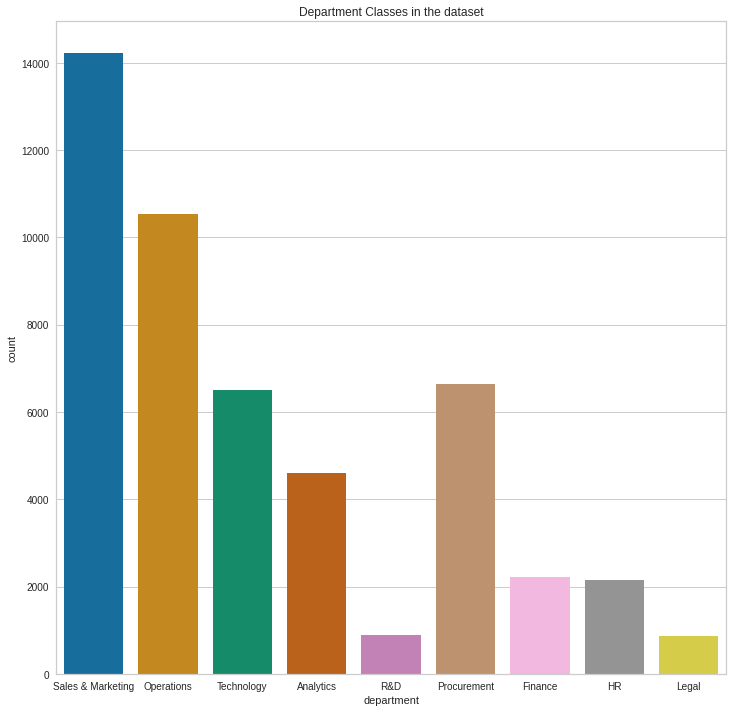

In [ ]:
# Department classes in the dataste
#
plt.figure(figsize=(12, 12))
sns.countplot(x='department', data=train, palette='colorblind')
plt.title('Department Classes in the dataset')
plt.show()

* The Sales & Marketing department produced the highest number of candidates for consideration. The Legal department produced the least together with the R&D departmemt. 

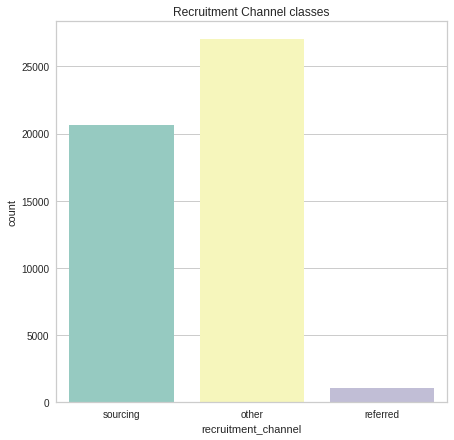

In [ ]:
# Recruitment channel classes distribution

plt.figure(figsize=(7,7))
sns.countplot(x='recruitment_channel', data=train, palette='Set3')
plt.title('Recruitment Channel classes')
plt.show()

* Most candidates were recruited using miscalleneous channels 
while referrals were the least in number

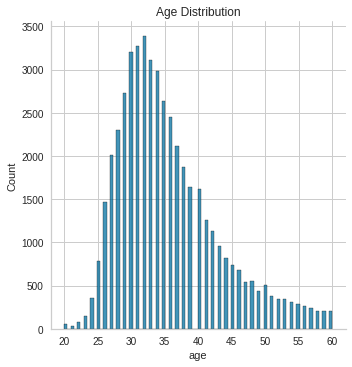

In [ ]:
sns.displot(data=train, x='age', kind='hist', palette='Set2')
plt.title('Age Distribution')
plt.show()

* The age distribution is asymmetrical(postively skewed)

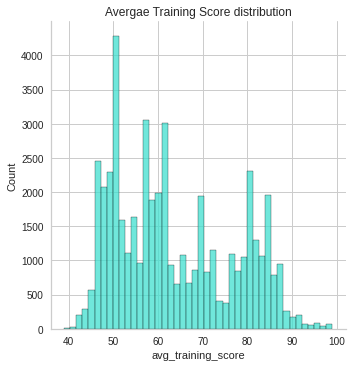

In [ ]:
sns.displot(x='avg_training_score', data=train, palette='pastel', color='turquoise')
plt.title('Avergae Training Score distribution')
plt.show()

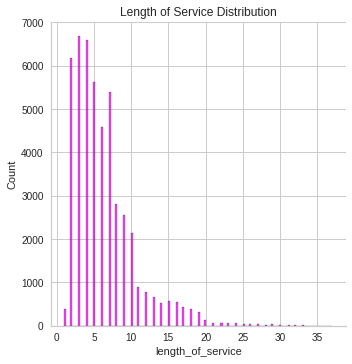

In [ ]:
# Length of Service distribution in the dataset

sns.displot(data=train, x='length_of_service', color='magenta', palette='bright')
plt.title('Length of Service Distribution')
plt.show()

* The greatest majority of people have served the company between 1 and 7 years as shown above. Very few indivuals have service beyond 20 years.
* The distrbution is also positively skewed.

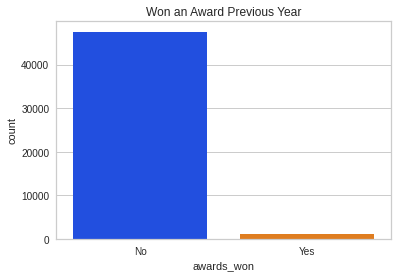

In [ ]:
# Winning Awards in the previous year countplots

sns.countplot(x='awards_won', data=train, color='lightgreen', palette='bright')
plt.title('Won an Award Previous Year')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.show()

* Majority of the candidates had not won any awards in the previous years.

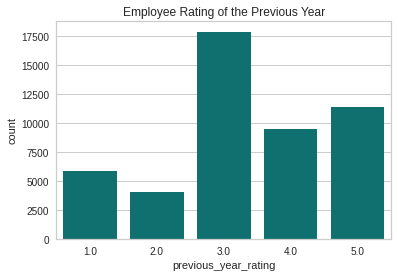

In [ ]:
# Employee rating of the Previous Year

sns.countplot(x='previous_year_rating', data=train, color='teal')
plt.title('Employee Rating of the Previous Year')
plt.show()


* The largest composition of candidates had a rating  of 3 (on a scale of 1-5) as also confirmed by the mean rating.

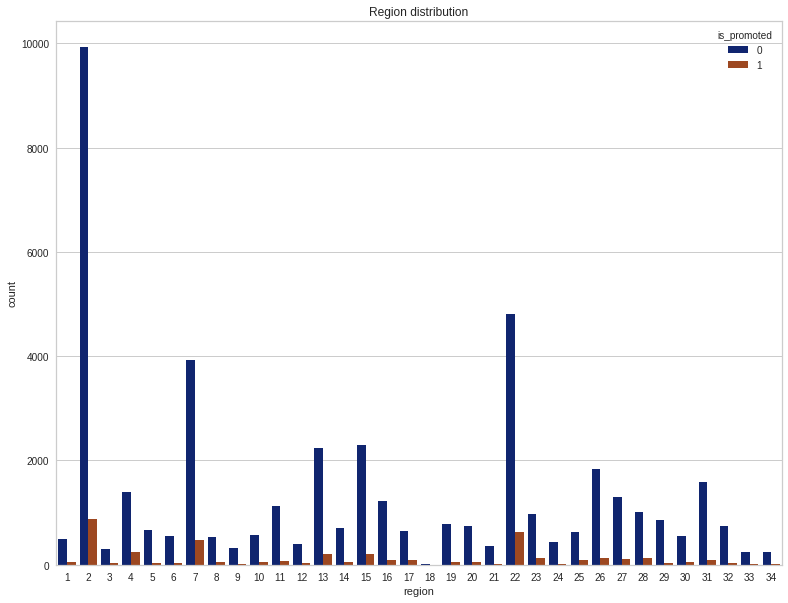

In [ ]:
# Region distribution in the dataset
plt.figure(figsize=(13,10))
sns.countplot(x='region', data=train, palette='dark', hue='is_promoted')
plt.title("Region distribution")
plt.show()


* Region 2 is the most predominant region in the dataset with 7 and 22 also having unusually large inputs as well. The rest are moderate.

### Bivariate Analysis

[]

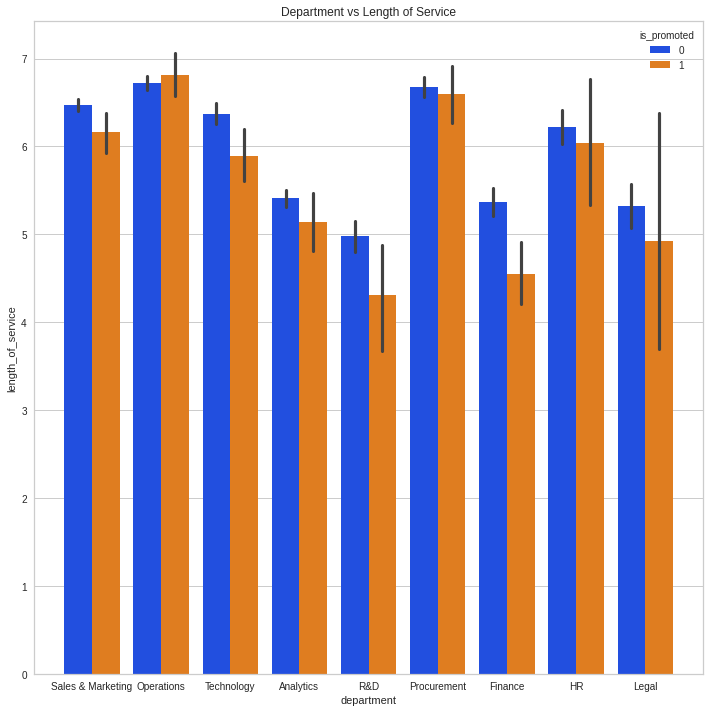

In [ ]:
# Departments vs Length of Service and Promotions
#
plt.figure(figsize=(12,12))
sns.barplot(x='department', y='length_of_service', data=train, palette='bright', hue='is_promoted')
plt.title('Department vs Length of Service')
plt.plot()



*  Procurement is the only department


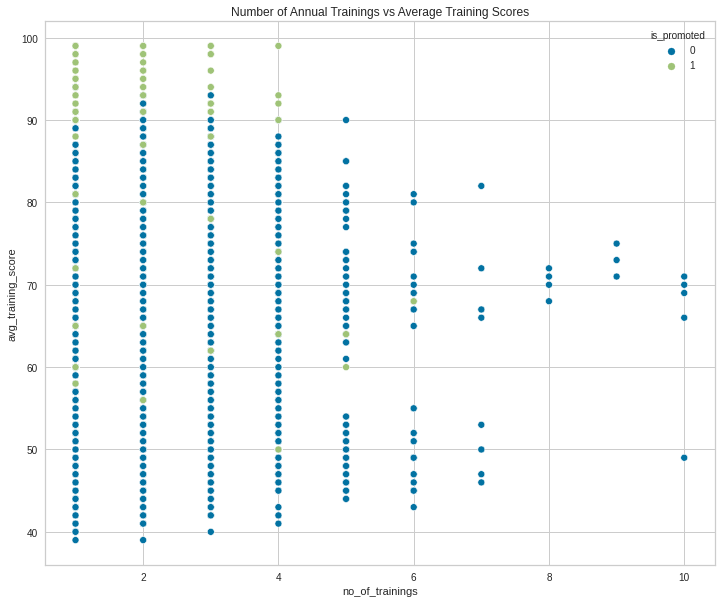

In [ ]:
# Number of Annual Trainings vs Average Training Scores

plt.figure(figsize=(12,10))
sns.scatterplot(x='no_of_trainings', y='avg_training_score', data=train, hue='is_promoted')
plt.title('Number of Annual Trainings vs Average Training Scores')
plt.show()

* Having a high number of trainings in the previous year did not guarantee a promotion.
* A high score in the training evaluations boosted a candidates chances especially if they had between 1 and 4 trainings in the last year

<Figure size 864x720 with 0 Axes>

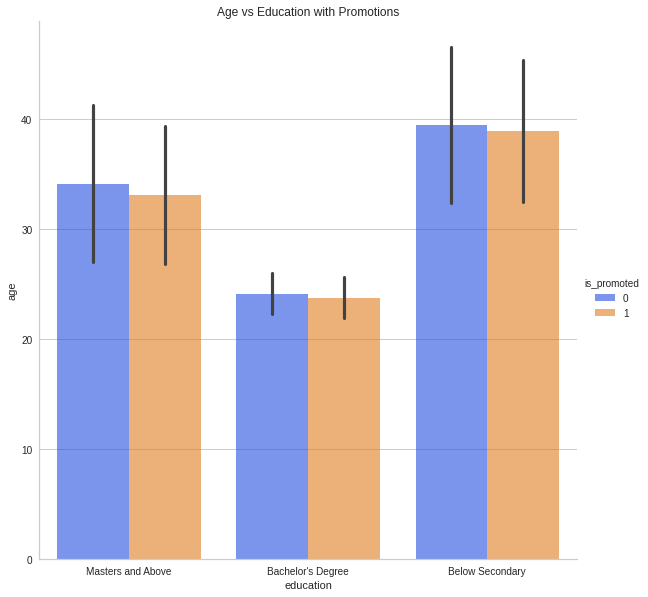

In [ ]:
# Relationship between Education, age and Promotions
plt.figure(figsize=(12,10))
sns.catplot(x='education', y='age', hue='is_promoted', data=train, kind='bar',
            palette='bright', ci='sd', alpha=.6, height=8)
plt.xticks(ticks=[0,1,2], labels=['Masters and Above', "Bachelor's Degree", "Below Secondary"])
plt.title("Age vs Education with Promotions")
plt.show()

* Education level is really not a distinguishing feature in terms of promotions

<Figure size 576x576 with 0 Axes>

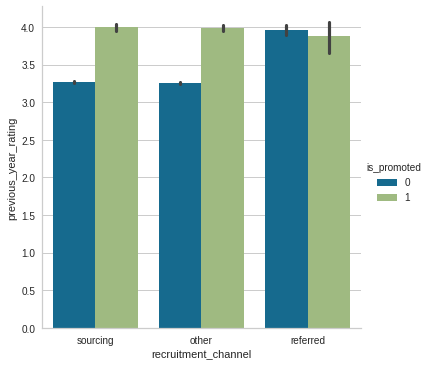

In [ ]:
# Relationship between Recruitment channels, Previous year ratings and Promotions

plt.figure(figsize=(8,8))
sns.catplot(x='recruitment_channel', y='previous_year_rating', data=train, hue='is_promoted', kind='bar')
plt.show()

* Referral candidates had almost a 50-50 chance of being promoted. The other two recruitment channels had more promotions than not

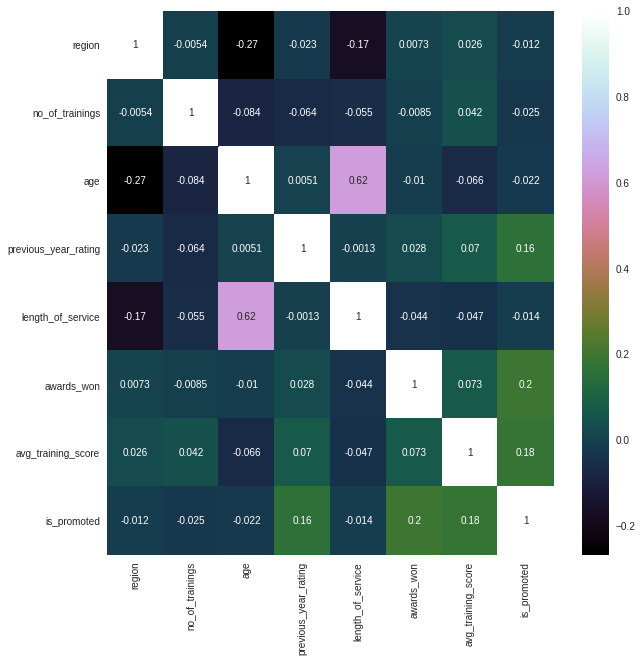

In [ ]:
# A heatmap inspecting correlations between variables in the dataset

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap='cubehelix', annot=True)
plt.show()

### Checking for Multicollinearity

In [ ]:
#  compute the VIF
# 
correlations = train.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
region,1.078938,0.032783,0.283316,0.023874,0.010832,-0.007822,-0.015124,0.020914
no_of_trainings,0.032783,1.014586,0.086637,0.064695,0.006627,0.006357,-0.046880,0.024700
age,0.283316,0.086637,1.711141,-0.004865,-1.006720,-0.036936,0.052458,0.028232
previous_year_rating,0.023874,0.064695,-0.004865,1.032481,0.007759,0.005792,-0.048316,-0.154429
length_of_service,0.010832,0.006627,-1.006720,0.007759,1.629663,0.062859,0.007493,-0.013973
awards_won,-0.007822,0.006357,-0.036936,0.005792,0.062859,1.044530,-0.040556,-0.199249
avg_training_score,-0.015124,-0.046880,0.052458,-0.048316,0.007493,-0.040556,1.043363,-0.171695
is_promoted,0.020914,0.024700,0.028232,-0.154429,-0.013973,-0.199249,-0.171695,1.095880


## Modeling Preparation

In [ ]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,7.0,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,0.0,49.0,0.0
1,Operations,22.0,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,60.0,0.0
2,Sales & Marketing,19.0,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,50.0,0.0
3,Sales & Marketing,23.0,Bachelor's,m,other,2.0,39.0,1.0,10.0,0.0,50.0,0.0
4,Technology,26.0,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,73.0,0.0


In [ ]:
# Instantiating LabelEncoder and StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [ ]:
# Encoding categorical columns
train['region'] = train['region'].astype('category')
train['is_promoted'] = train['is_promoted'].astype('category')
train['department'] = encoder.fit_transform(train['department'])
train['education'] = encoder.fit_transform(train['education'])
train['gender'] = encoder.fit_transform(train['gender'])
train['recruitment_channel'] = encoder.fit_transform(train['recruitment_channel'])

In [ ]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,7,2,0,2,1,35,5.0,8,0,49,0
1,4,22,0,1,0,1,30,5.0,4,0,60,0
2,7,19,0,1,2,1,34,3.0,7,0,50,0
3,7,23,0,1,0,2,39,1.0,10,0,50,0
4,8,26,0,1,0,1,45,3.0,2,0,73,0


In [ ]:
# Encoding the test dataset categroical variables

test['region'] = test['region'].astype('category')
test['department'] = encoder.fit_transform(test['department'])
test['education'] = encoder.fit_transform(test['education'])
test['gender'] = encoder.fit_transform(test['gender'])
test['recruitment_channel'] = encoder.fit_transform(test['recruitment_channel'])

In [ ]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,2,4.0,0,0,0,1.0,31.0,3.0,5.0,0.0,51.0
1,7,13.0,0,1,0,1.0,31.0,1.0,4.0,0.0,47.0
2,5,2.0,0,0,0,3.0,31.0,2.0,9.0,0.0,65.0
3,1,29.0,0,1,2,1.0,30.0,4.0,7.0,0.0,61.0
4,5,7.0,0,1,2,1.0,36.0,3.0,2.0,0.0,68.0


## Solution Implementation using Modelling

### Random Forest Classifier

In [ ]:
# Separating features and target variables

X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [ ]:
feature_names = list(train.columns)
feature_names.remove('is_promoted')

In [ ]:
# splitting the train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=23)

In [ ]:
forest = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=13, min_samples_split=15)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

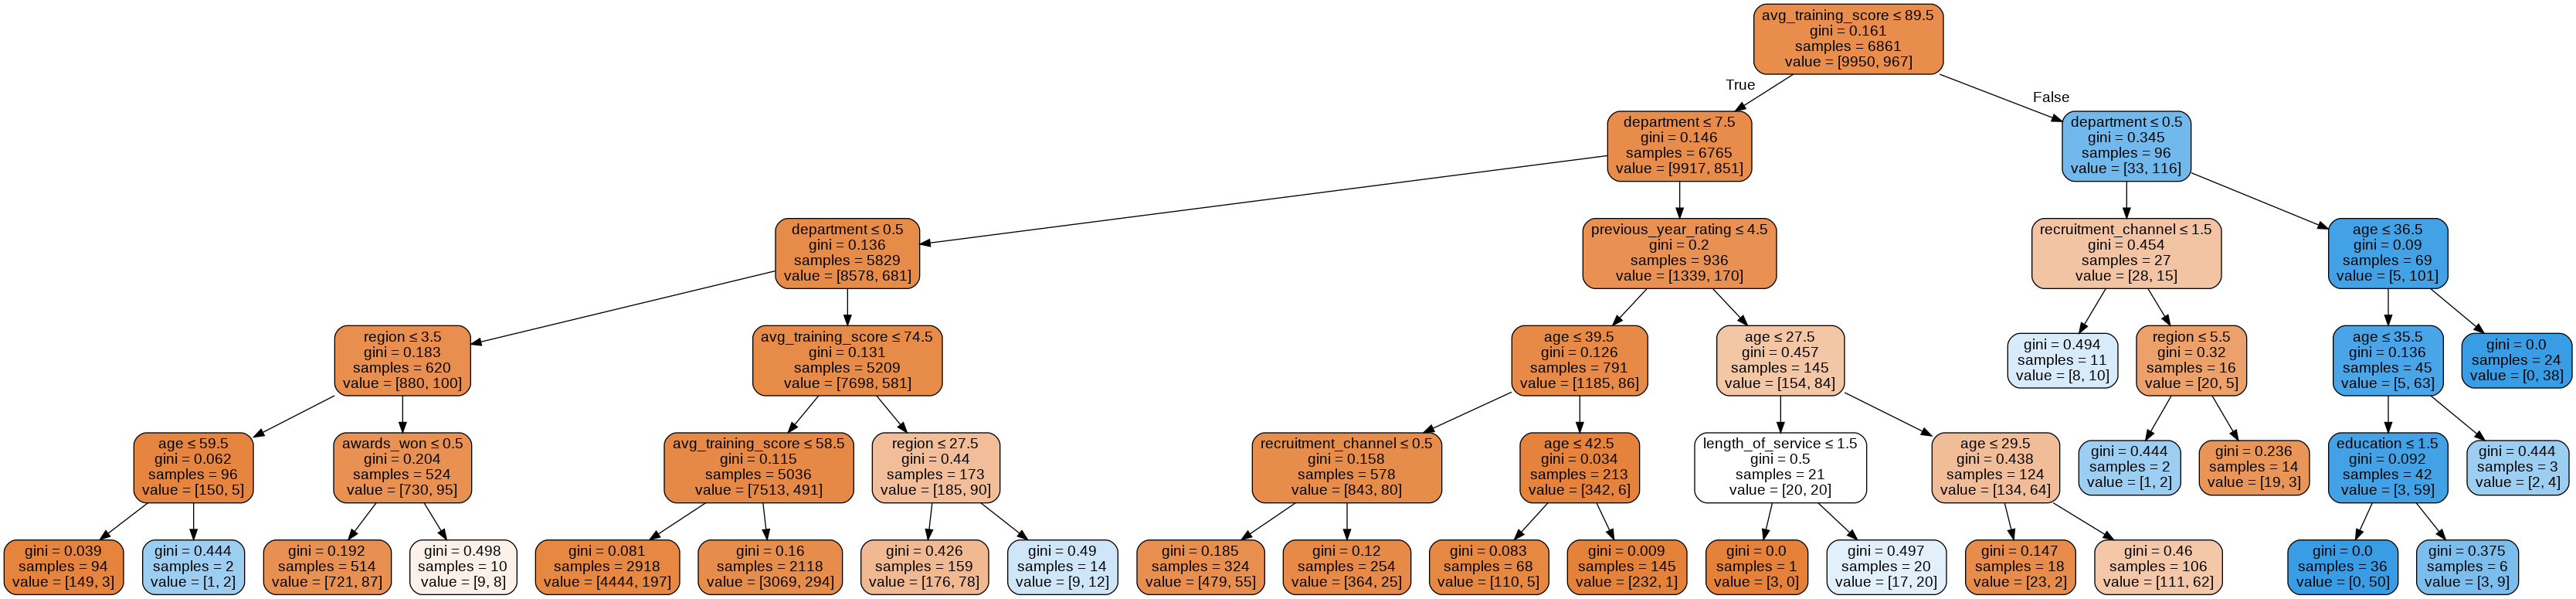

In [ ]:
# visualize our a specific tree from the estimator
dot_data = StringIO()
tree = forest.estimators_[250]


export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Promotion_tree.png')
Image(graph.create_png())

In [ ]:
# feeding the forest with the test data and evaluating its performance
forest_pred = forest.predict(X_test)

confusion_matrix(y_test, forest_pred)

array([[4260,    3],
       [ 373,   44]])

In [ ]:
# classification report of the model
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      4263
         1.0       0.94      0.11      0.19       417

    accuracy                           0.92      4680
   macro avg       0.93      0.55      0.57      4680
weighted avg       0.92      0.92      0.89      4680



In [ ]:
# scoring the model
forest.score(X_test, y_test)

0.9196581196581196

In [ ]:
# cross validating this model
c_score_f1 = cross_val_score(estimator=forest, X=X_train, y=y_train, scoring='accuracy', cv=5)
print("Cross validated score of this model is: ", c_score_f1.mean())

Cross validated score of this model is:  0.9240633164361978


The Random Forest Classifier performs fairly okay without any hyperparameter tuning. GridSearchCV shall be used to find the best estimator.

In [ ]:
# using GridSearchCV to find best possible combination of parameters
parameters = {'max_depth' : [1, 3, 5, 7, 9],
              'min_samples_split' : [10, 15, 20, 25, 30],
              'n_estimators' : [300, 500, 700, 1000],
              'criterion' : ['gini', 'entropy']}




search = GridSearchCV(estimator=forest,
                      scoring='accuracy',
                      param_grid=parameters,
                      cv=5)

search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=15,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=13,
                                    

In [ ]:
df = pd.DataFrame(search.cv_results_)
df2 = df[['param_criterion', 'param_max_depth',
          'param_min_samples_split', 'param_n_estimators', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)
df2.head()

,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score
184,entropy,9,15,300,0.925163
186,entropy,9,15,700,0.925163
192,entropy,9,25,300,0.925071
185,entropy,9,15,500,0.924979
180,entropy,9,10,300,0.924979


The cross validated score doesn't shift by much (from 92.4% to 92.6%). This 'jump' is not enough to warrant an overhaul of the initial hyperparameters.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


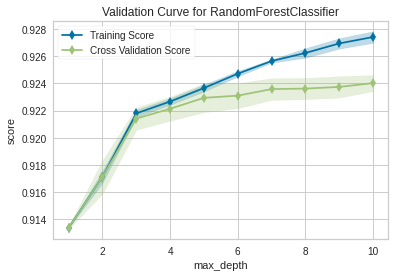

In [ ]:
# visual on how the max depth affects accuracy

max_d = validation_curve(model=forest,
                       X=X_train, y=y_train, param_name='max_depth', param_range=np.arange(1,11),
                       cv=5, scoring='accuracy')
max_d

From the above plot, the optimum depth to use in RFC is 3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


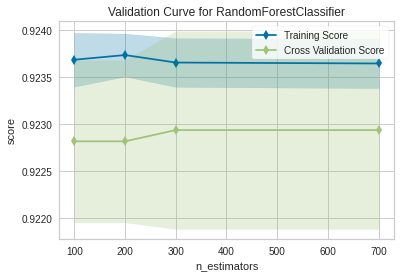

In [ ]:
max_trees = validation_curve(model=forest,
                       X=X_train, y=y_train, param_name='n_estimators', param_range=np.array([100, 200, 300, 700]),
                       cv=5, scoring='accuracy')
max_trees

300 seems to provided the sweet spot between training and test scores.(the least variance)

In [ ]:
# refitting the forest with these two parameters

forest2 = RandomForestClassifier(n_estimators=300, criterion='entropy',
                                 min_samples_split=25, max_depth=3)

forest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# evaluating the model
print("General score: ", forest2.score(X_test, y_test))

c_score_f2 = cross_val_score(estimator=forest2,
                             X=X_train,
                             y=y_train,
                             scoring='accuracy',
                             cv=5)

print("Cross validated score: ", c_score_f2.mean())

General score:  0.9177350427350427
Cross validated score:  0.9223227604583537


#### Feature Importances

In [ ]:
f_importances = {}
forest2_coef = forest2.feature_importances_
for feat, coef in zip(feature_names, forest2_coef):
  f_importances[feat] = coef

pd.DataFrame.from_dict(f_importances, orient='index', columns=['Coefficients']).sort_values(by='Coefficients', ascending=False)

,Coefficients
avg_training_score,0.488068
previous_year_rating,0.212979
awards_won,0.191650
department,0.040502
age,0.019369
region,0.017305
education,0.011459
no_of_trainings,0.010847
length_of_service,0.005551
gender,0.001278


**Remarks**

According to the Second RFC, the most important features in predicting whether an individual gets promoted or not are:
*  Average training scores
*  Previous Year Rating
* Whether or not they won an award in the previous year.

### AdaBoost Classifier

Using the same training data, perhaps Boosting techniques might improve the classifier's accuracy. It's important to remember that Adaboost requires a simple decision tree in its constructor

In [ ]:
# instantiating the Classifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500,
                               random_state=23, learning_rate=0.1)


ada_boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
# Assessing the accuracy of the model using Cross validation

c_score_ada = cross_val_score(estimator=ada_boost,
                              X=X_train,
                              y=y_train,
                              cv=5,
                              scoring='accuracy')

print("Cross validated accuracy is: ",c_score_ada.mean())

Cross validated accuracy is:  0.9258041241092089


Adaboost Classifier improved by 1% when compared to the Random Forest Classifier.

#### Feature importances

In [ ]:
a_importances = {}
a_coef = ada_boost.feature_importances_

for feat, coef in zip(feature_names, a_coef):
  a_importances[feat] = coef

pd.DataFrame.from_dict(a_importances, orient='index', columns=['coefficients']).sort_values(by='coefficients', ascending=False)

,coefficients
avg_training_score,0.222139
region,0.173275
age,0.167136
length_of_service,0.143259
department,0.075032
previous_year_rating,0.072581
recruitment_channel,0.044672
gender,0.033679
no_of_trainings,0.033529
education,0.025248


**Remarks**

According to Adaboost Classifier, the most import features are:
* Average Training Score
* Region
* Age of the candidate
* Length of Service

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


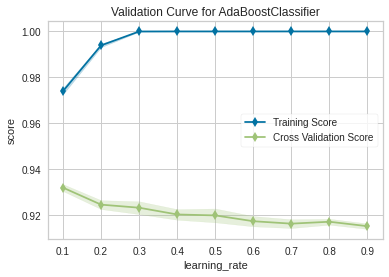

In [ ]:
# examining how learning rate affects our model performance
validation_curve(ada_boost, X=X_train, y=y_train, cv=5, param_range=np.arange(0.1, 1, 0.1),
                 scoring='accuracy', n_jobs=-1, param_name='learning_rate')

Interpreatation:


*   Any learning rate above .1 leads to overfitting the model and therefore not a viable solution. This learning rate provides the least disparity between training and test scores



### Support Vector Classifier

In [ ]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

# shuffling the data
X = shuffle(X, random_state=7)
y = shuffle(y, random_state=23)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)

In [ ]:
# Instantiating our model

svc = SVC(kernel='rbf')

# fitting the model
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# assessing the performance

print("General performance: ",svc.score(X_test, y_test))

c_score_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, scoring='accuracy', cv=5)

print("Cross validated model performance: ", c_score_svc.mean())

General performance:  0.9115384615384615
Cross validated model performance:  0.913360599403936


In [ ]:
# Hyperparameter tuning

clf = GridSearchCV(estimator=SVC(),
                   param_grid={'kernel' : ['rbf', 'sigmoid'],
                               'gamma' : ['scale', 'auto'],
                               'C' : np.arange(1, 10, 2)},
                   scoring='accuracy',
                   cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1, 3, 5, 7, 9]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
compare = pd.DataFrame(clf.cv_results_)
compare = compare[['param_gamma', 'param_kernel', 'param_C', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)
compare.reset_index(drop=True, inplace=True)
compare

,param_gamma,param_kernel,param_C,mean_test_score
0,scale,rbf,1,0.913402
1,auto,sigmoid,3,0.913402
2,scale,rbf,9,0.913402
3,auto,sigmoid,7,0.913402
4,scale,rbf,7,0.913402
5,auto,sigmoid,5,0.913402
6,scale,rbf,5,0.913402
7,auto,sigmoid,9,0.913402
8,scale,rbf,3,0.913402
9,auto,sigmoid,1,0.913402


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


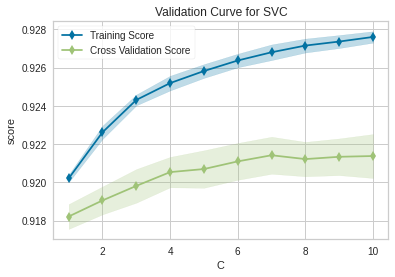

In [ ]:
# specifically visualizing how the C parameter affects our model
c_val = validation_curve(model=SVC(kernel='rbf', gamma='scale'),
                         X=X_train,
                         y=y_train,
                         cv=5, scoring='accuracy',
                         param_name='C', param_range=np.arange(1,11))
c_val

**Comments**: 
* The initial hyperparamters chosen and the ones offered by GridSearchCV  yield exactly the same cross validated score. Therefore, no changes will be made.
* Also, a higher value of C leads to overfitting and therefore the default value is optimum.




#### Feature Importances

The coefficients are only available using a linear kernel.

### Naive Bayes Classifier

In [ ]:
# feature and target variables separation and shuffling

X = shuffle(train.iloc[:, 0:-1], random_state=23)
y = shuffle(train.iloc[:, -1], random_state=23)


In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)

In [ ]:
# scaling the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

After scaling, the only viable Naive Bayes model would be the GaussianNB classifier due to the presence of negative values

In [ ]:
# Instantiating and fitting the model

gauss = GaussianNB()
gauss.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Scoring the model

print("General score: ", gauss.score(X_test, y_test))

c_score_gnb = cross_val_score(estimator=gauss, X=X_train, y=y_train, scoring='accuracy', cv=5)

print("Cross validated score: ", c_score_gnb.mean())

General score:  0.9105769230769231
Cross validated score:  0.9099138661939262


Perhaps the model can be improved using LinearDiscriminantAnalysis with a single component

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)

In [ ]:
lda = LDA(n_components=1)

# transforming the features
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# fitting the data into the model
gauss_lda = GaussianNB()
gauss_lda.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Evaluating its performance
print("General score: ", gauss_lda.score(X_test, y_test))

c_score_glda = cross_val_score(estimator=gauss_lda, X=X_train, y=y_train, scoring='accuracy', cv=5)

print("Cross Validated Score: ", c_score_glda.mean())

General score:  0.9131410256410256
Cross Validated Score:  0.9111963028621345


Performing feature reduction using LDA does not significantly improve the model to warrant its usage. The prior Gaussian model is a better fit for our solution

### MLP Classifier

In [ ]:
# feauture and variable separation
X =shuffle(train.iloc[:,:-1], random_state=23)
y = shuffle(train.iloc[:, -1], random_state=23)

In [ ]:
# train test split and scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
nn_model = MLPClassifier(activation='logistic', solver='adam',
                         learning_rate='adaptive', hidden_layer_sizes=(30,30,30), max_iter=2000)

nn_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Evaluating the model
print("General score: ", nn_model.score(X_test, y_test))
c_score_nn = cross_val_score(estimator=nn_model, X=X_train,
                             y=y_train,
                             cv=5,
                             scoring='accuracy')

print("Cross validated score: ", c_score_nn.mean())

General score:  0.925
Cross validated score:  0.9276267278146036


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


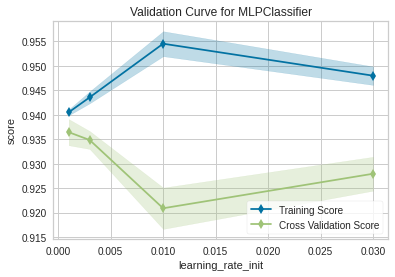

In [ ]:
# hyperparameter tuning of the learning rate


v_curve = validation_curve(model=nn_model,
                           X=X_train,
                           y=y_train,
                           param_name='learning_rate_init',
                           cv=5,
                           scoring='accuracy',
                           param_range=np.array([0.001, 0.003, 0.01, 0.03]))
v_curve

### Comparing model scores

In [ ]:
performance = {'RFC1' : c_score_f1.mean(),
               'RFC2' : c_score_f2.mean(),
               'ADA' : c_score_ada.mean(),
               'SVC' : c_score_svc.mean(),
               'NB' : c_score_gnb.mean(),
               'NB_lda' : c_score_glda.mean(),
               'NN' : c_score_nn.mean()}


comparison = pd.DataFrame.from_dict(performance, orient='index', columns=['Mean_CV_score'])

comparison.sort_values(by='Mean_CV_score', ascending=False)

,Mean_CV_score
NN,0.927627
ADA,0.925804
RFC1,0.924063
RFC2,0.922323
SVC,0.913361
NB_lda,0.911196
NB,0.909914


### Predictions using Test dataset

In [ ]:
# Feeding the test dataset to the best classifier and making predictions

test = scaler.transform(test)

predictions = nn_model.predict(test)
test_pred = pd.DataFrame(predictions, columns=['Survived'])
test_pred.sample(5)

,Survived
6929,1.0
3812,0.0
14566,0.0
13192,0.0
13492,0.0


In [ ]:
test_pred.value_counts()

Survived
0.0         15723
1.0           393
dtype: int64

## Challenging the Solution

We strongly believe that the models might have picked up some unintentionally biases during training regarding:
 - Gender
 - Region.

The models might yet improve, especially ethically, when provided with more balanced data when it comes to gender and region distribution.

## Recommendations

From the in depth analysis above, we have the following recommendations that could possibly help solve our research question:


1.   The HR should be mindful of the following candidate attributes as they are some of the best indicators:
  - Average Training Scores. The higher the better.
  - Previous Year Rating. A higher rating indicates a well performing employee and one with good chances of earning a promotion.
  - Region. Though this may be due to imbalanced sample distributions.
  - Age and Length of service to their departments. These two practically went hand in hand.
2.   We have also offered five high performing models that can predict whether or not a candidate can be promoted, with a minimum accuracy of 90%, when fed with the corresponding data about the individual. On that note, the most recommended model would be the the Multi-Layer Perceptrons model which was the best out of the five.

